created 6-12-24
#  <mark style="background-color: #c8bbd8"> <font color ='#163550'> Input Figures </font></mark>
# <mark style="background-color: #F096AD"> <font color ='#163550'> Table of Contents </font></mark>
1. [Background](#1)
2. [Non-Uniform Forcing Files](#2)
3. [Uniform Forcing Files](#3)


# <mark style="background-color: #F096AD"> <font color ='#163550'> 1. Background </font></mark>
<a name=1></a>
These files were created using the notebooks in [`6-21_build_INPUT`](https://github.com/kailauyeda/single_basin_amoc_tropics/tree/main/6-21_build_INPUT). This notebook shows what those files look like. `MESO` is turned on in `MOM_input`, requiring wind, sea surface temperature, salinity, long wave heat flux, short wave heat flux, and precipitation minus evaporation. 

In [1]:
import xarray as xr
from xgcm import Grid
import numpy as np
import warnings
from matplotlib import pyplot as plt
import matplotlib.ticker as tick
import cmocean.cm as cmo
import cmocean
import pandas as pd
%matplotlib inline
plt.rcParams['figure.figsize']=(8,5)

In [2]:
string = '/vortex1/jupyter-kuyeda/t_m_p_wind/6-21_build_INPUT/6-21_INPUT_files/'

#'/h/kuyeda/INPUT/'
bath = xr.open_dataset(string + 'topo_file_test1.nc')
wind = xr.open_dataset(string + 'wind_sample_nov_10.nc')
sst = xr.open_dataset(string + '11-27_NaN_SST.nc')
net_sol = xr.open_dataset(string + '11-27_zero_NET_SOL.nc')
heat = xr.open_dataset(string + '11-27_zero_Heat.nc')
sal = xr.open_dataset(string + '11-27_NaN_SAL.nc')
PmE = xr.open_dataset(string + '11-29_PmE_all_zeros.nc')

# <mark style="background-color: #F096AD"> <font color ='#163550'> 2. Non-Uniform Forcing Files </font></mark>
<a name=2></a>
## <mark style="background-color: #BCD7DB"> a. Surface Temp. </mark>

$$
\begin{align}
T &= T_{eq}\left[cos\left(\frac{\pi \varphi}{140}\right)^2 + 0.1e^{-\left(\frac{\varphi}{2\Theta} -1\right)^2} \right] \\
\text{where } &T_{eq} = 25{^\circ}C \text{ , } \varphi = \text{ latitude, and } \Theta = 60^{\circ}
\end{align}
$$

## <mark style="background-color: #B8B65D"> b. Zonal Wind </mark>
$$ 
\begin{align}
\tau_x &= \tau_{max} \left[ - cos\left(\frac{3 \pi \varphi}{140}\right) + e^{-\varphi^2 / \sigma^2} \right] \\
\tau_y &= 0 \\
\text{where } &\tau_{max} = 0.1\text{   Pa,   } \varphi =  \text{ longitude, &   }  \sigma=10^{\circ}
\end{align}
$$

## <mark style="background-color: #C8BBD8"> c. Bathymetry </mark>

See `bathymetry_wind_SST_build.ipynb`.

Text(0.5, 1.1, 'Idealized Model Set-Up')

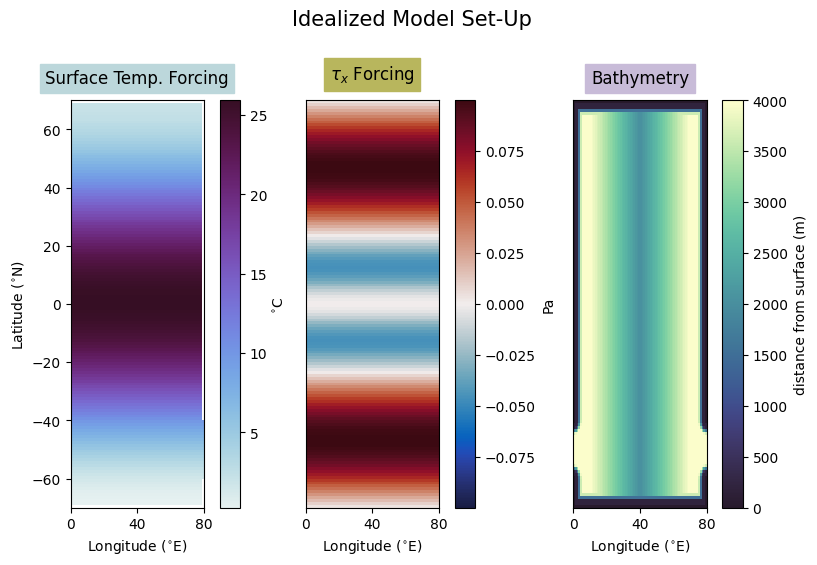

In [5]:
fig,ax=plt.subplots(nrows=1,ncols=3,constrained_layout=True)
sst.SST.plot(cbar_kwargs={'label':'$^{\circ}$C'},ax=ax[0],cmap=cmocean.cm.dense)
ax[0].set_aspect(140/80)
ax[0].set_title('Surface Temp. Forcing',backgroundcolor='#BCD7DB',pad=12)
ax[0].set_ylabel('Latitude ($^{\circ}$N)')
ax[0].set_xlabel('Longitude ($^{\circ}$E)')
ax[0].set_xlim(0,80)
ax[0].set_xticks((0,40,80))

wind.taux.plot(cbar_kwargs={'label':'Pa'},ax=ax[1],cmap=cmocean.cm.balance)
ax[1].set_aspect(140/80)
ax[1].set_title('$\\tau_x$ Forcing',backgroundcolor='#B8B65D',pad=15)
ax[1].set_ylabel('')
ax[1].set_xlabel('Longitude ($^{\circ}$E)')
ax[1].set_xlim(0,80)
ax[1].tick_params(axis='y',left=False,labelleft=False)
ax[1].set_xticks((0,40,80))

bathmap = cmocean.tools.crop(cmocean.cm.topo,0,2000,2000)
bath.z.plot(cbar_kwargs = {'label':'distance from surface (m)'},ax=ax[2],cmap=bathmap)
ax[2].set_aspect(140/80)
ax[2].set_title('Bathymetry',backgroundcolor='#C8BBD8',pad=12)
ax[2].set_ylabel('')
ax[2].set_xlabel('Longitude ($^{\circ}$E)')
ax[2].set_xlim(0,80)
ax[2].set_xlim(0,80)
ax[2].tick_params(axis='y',left=False,labelleft=False)
ax[2].set_xticks((0,40,80))


fig.suptitle('Idealized Model Set-Up',fontsize=15,y=1.1)

(-80.0, 80.0)

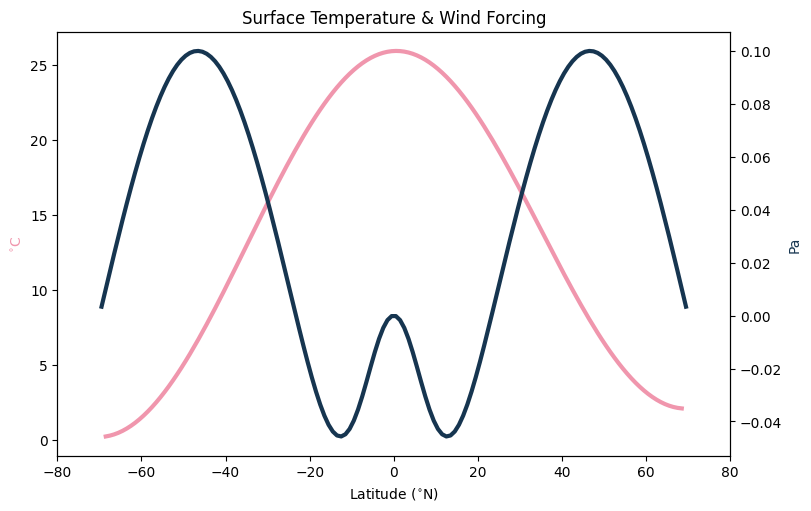

In [47]:
fig,ax = plt.subplots(nrows=1,ncols=1,constrained_layout=True)
sst.SST.isel(xh=40).plot(label='Temperature ($\theta$)',color='#F096ad',linewidth=3)
ax2 = ax.twinx()
wind.taux.isel(xq=40).plot(label='Wind ($\\tau_x$)',color='#163550',linewidth=3)
ax.set_title('Surface Temperature & Wind Forcing')
ax.set_ylabel('$^{\circ}$C',color='#F096ad')
ax.tick_params(axis='y')

ax2.set_title('')
ax2.tick_params(axis='y')
ax2.set_ylabel('Pa',color='#163550')

ax.set_xlabel('Latitude ($^{\circ}$N)')
ax.set_xlim(-80,80)

# <mark style="background-color: #F096AD"> <font color ='#163550'> 3. Uniform Forcing Files </font></mark>
<a name=3></a>
The values in these files do not matter because they are held constant and set in the `MESO_surface_forcing.F90` file. There are no units because these are "fake files" that will not be actually be used for calculations in the simulations.

**NOTE: In `MESO_surface_forcing.F90`, we set fluxes_vprec(rho_restore, flux_const, salt) =0.**

|variable name | called in `MESO_surface_forcing.F90`| full name | actually contains|why|
|:--| :--| :--|:--|:--|
|`NET_SOL` | `solar_file` |short wave heat flux| match SST|??|
|`Heat`| `heating_file`| longwave \& sensible heat flux| match SST| ??|
|`SAL`| `salinityrestore_file` | salinity| match SST| only used in `fluxes%vprec`|
|`PmE` |`PmE_file` | precipitation - evaporation| zeros| we don't want any preciptiation; used in `fluxes%lprec`|



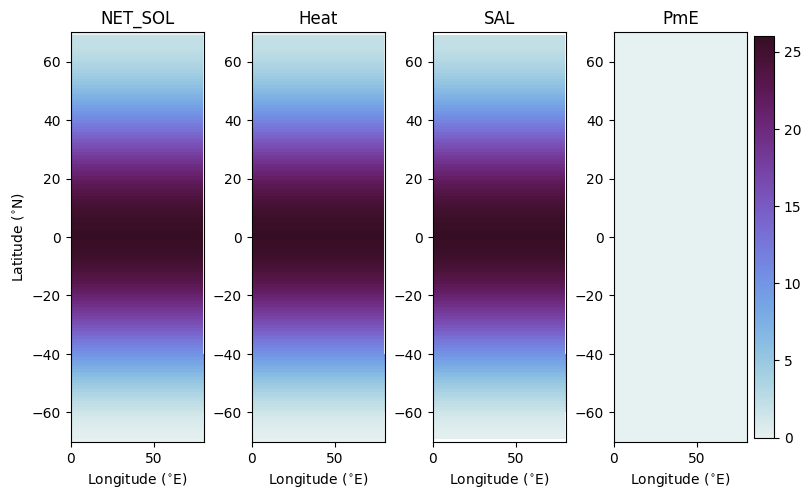

In [4]:
other_forcing_files = [net_sol.NET_SOL, heat.Heat, sal.SAL, PmE.PmE]
titles = ['NET_SOL', 'Heat', 'SAL', 'PmE']
fig,ax = plt.subplots(nrows=1,ncols=4,constrained_layout=True)
for i in range (0,4):
    m = other_forcing_files[i].plot(ax=ax[i],vmin=0,vmax=26,add_colorbar=False,cmap=cmocean.cm.dense)
    ax[i].set_aspect(140/80)
    ax[i].set_xlabel('Longitude ($^{\circ}$E)')
    ax[i].set_title(titles[i])
    ax[i].set_ylabel('')
    
ax[0].set_ylabel('Latitude ($^{\circ}$N)')
fig.colorbar(m,ax=ax[-1])